Problem 4


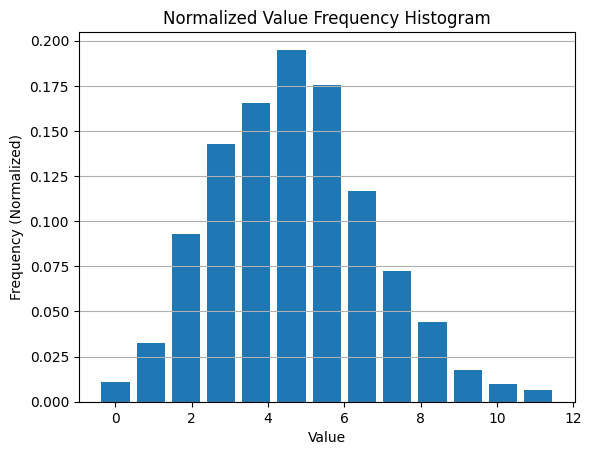

In [3]:
import math
import random
import time
import matplotlib.pyplot as plt

def poisson(l):
    L = math.exp(-l)
    p = 1.0
    k = 0
    while p > L:
        k += 1
        p *= random.random()
    return k - 1

def main():
    random.seed(time.time())

    mean = 5.0  # lambda
    num_samples = 1000

    values = []
    for i in range(num_samples):
        value = poisson(mean)
        values.append(value)

    plt.hist(values, bins=max(values)-min(values)+1, rwidth=0.8, align='left', density=True)
    plt.xlabel("Value")
    plt.ylabel("Frequency (Normalized)")
    plt.title("Normalized Value Frequency Histogram")
    plt.grid(axis='y')
    plt.show()

if __name__ == "__main__":
    main()


In [66]:
import numpy as np

total_sim_time = 1000000  # Total simulation time in milliseconds
arrival_rate = 5  
service_time_percentages = [0.9, 0.1]  # Percentage of requests with different service times
uniform_service_times = [(3, 20), (200, 1000)]  # Uniform service time ranges (ms)

current_time = 0
response_times = {"Long": [], "Short": []}

task_list = []

while current_time < total_sim_time:
    request_type = "Short" if np.random.random() < service_time_percentages[0] else "Long"
    task_list.append((request_type, current_time))
    inter_arrival_time = np.random.poisson(lam=arrival_rate)
    current_time += inter_arrival_time

In [71]:
tasknum = len(task_list)
service_start_time = [0] * tasknum
service_end_time = [0] * tasknum
service_times = [0] * tasknum

for i in range(tasknum):
    request_type, arrival_time = task_list[i]
    service_time = np.random.uniform(*uniform_service_times[0 if request_type == "Short" else 1])
    
    if i == 0:
        service_start_time[i] = arrival_time
    else:
        service_start_time[i] = max(arrival_time, service_end_time[i-1])
    service_end_time[i] = service_start_time[i] + service_time
    if service_end_time[i] > total_sim_time:
        break
    service_times[i] = service_time
    response_times[request_type].append(service_end_time[i] - arrival_time)
    
avg_response_time_long = np.mean(response_times["Long"])
avg_response_time_short = np.mean(response_times["Short"])
std_dev_response_time_long = np.std(response_times["Long"])
std_dev_response_time_short = np.std(response_times["Short"])
avg_server_utilization = np.sum(service_times) / total_sim_time
#  10000 task, 
print(f"Average Response Time (Long): {avg_response_time_long:.2f} ms")
print(f"Average Response Time (Short): {avg_response_time_short:.2f} ms")
print(f"Standard Deviation (Long): {std_dev_response_time_long:.2f} ms")
print(f"Standard Deviation (Short): {std_dev_response_time_short:.2f} ms")
print(f"Average Server Utilization: {avg_server_utilization}")

ratio_long = std_dev_response_time_long / avg_response_time_long
ratio_short = std_dev_response_time_short / avg_response_time_short

print(f"Standard Deviation to Average Ratio (Long): {ratio_long:.2f}")
print(f"Standard Deviation to Average Ratio (Short): {ratio_short:.2f}")


Average Response Time (Long): 464747.47 ms
Average Response Time (Short): 470018.78 ms
Standard Deviation (Long): 268531.50 ms
Standard Deviation (Short): 265561.90 ms
Average Server Utilization: 0.9994192924523552
Standard Deviation to Average Ratio (Long): 0.58
Standard Deviation to Average Ratio (Short): 0.57
